# Public Transportations in Spain

# Introduction:

### Extensive Spanish High Speed Rail tickets pricing data analysis.
### This sample around 30 days , 2.5 million rows.

##### About the columns:

- insert date
- origin - from where
- destination
- start_date - start trip
- end_date- end trip
- train_type
- price
- train_class
- fare


# Mission 🙄👀🙄

- Data Exploration and analysis
- Analyze and Explore DataSet


In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset
df =pd.read_csv("../input/spain-public-transportation/public_transportation_data.csv")


# look the data set
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [3]:
# looking the shape DataSet
df.shape

(2579771, 10)

- We have 2,579,771 rows.

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   insert_date  object 
 2   origin       object 
 3   destination  object 
 4   start_date   object 
 5   end_date     object 
 6   train_type   object 
 7   price        float64
 8   train_class  object 
 9   fare         object 
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


In [5]:
#Conversion data type column - date from object to Datetime

df["insert_date"]=pd.to_datetime(df["insert_date"]) 

In [6]:
# look  describe data set
df["price"].describe().round(2)

count    2269090.00
mean          63.39
std           25.78
min           15.45
25%           43.75
50%           60.30
75%           78.80
max          214.20
Name: price, dtype: float64

- Average price 63

In [7]:
#checking null value 
df.isna().sum()

Unnamed: 0          0
insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

- we have missing data

# Handle missing data

In [8]:
# fill the column price based on origin 

avg=df.groupby(["origin"])["price"].mean()
avg

origin
BARCELONA     84.671718
MADRID        64.071365
PONFERRADA    42.004859
SEVILLA       62.470221
VALENCIA      39.852544
Name: price, dtype: float64

In [9]:
# fill nan in the column price
df['price'].fillna(avg,inplace=True)


In [10]:
# drop na value in this columns train class and fare

df.dropna(inplace=True)

In [11]:
#checking null value - again
df.isna().sum()

Unnamed: 0     0
insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [12]:
# looking the shape DataSet after handle missing data
df.shape

(2269090, 10)

- We have 2,579,771 rows.after handle missing data

In [13]:
# add column Day

df["Day"]=df["insert_date"].dt.day_name()

In [14]:
# defined function to calculate the time trip

df = df.reset_index()

datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = dt.datetime.strptime(b, datetimeFormat)- dt.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [15]:
# add column trip duration 

df["Trip duration"] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 


In [16]:
# add columns day and month and years

df["Month"]=df["insert_date"].dt.month
df["day"]=df["insert_date"].dt.day
df["year"]=df["insert_date"].dt.year

In [17]:
# show the data
df.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
0,0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,Friday,2.933333,4,19,2019
1,1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,Friday,2.533333,4,19,2019
2,2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,Friday,2.350000,4,19,2019
3,3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,Friday,2.533333,4,19,2019
4,5,5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo,Friday,2.633333,4,19,2019


In [18]:
df["year"].unique()

array([2019])

In [19]:
df["Month"].unique()

array([4, 5])

In [20]:
df["day"].unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 14, 11, 12, 13, 15, 16, 17, 18])

- from 19/4 to 18/5 year 2019

In [21]:
# calculate number of days 

num_day=df["insert_date"].dt.date.value_counts()
num_day=pd.DataFrame(num_day)
num_day.shape

(29, 1)

- 29 Days 

# Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

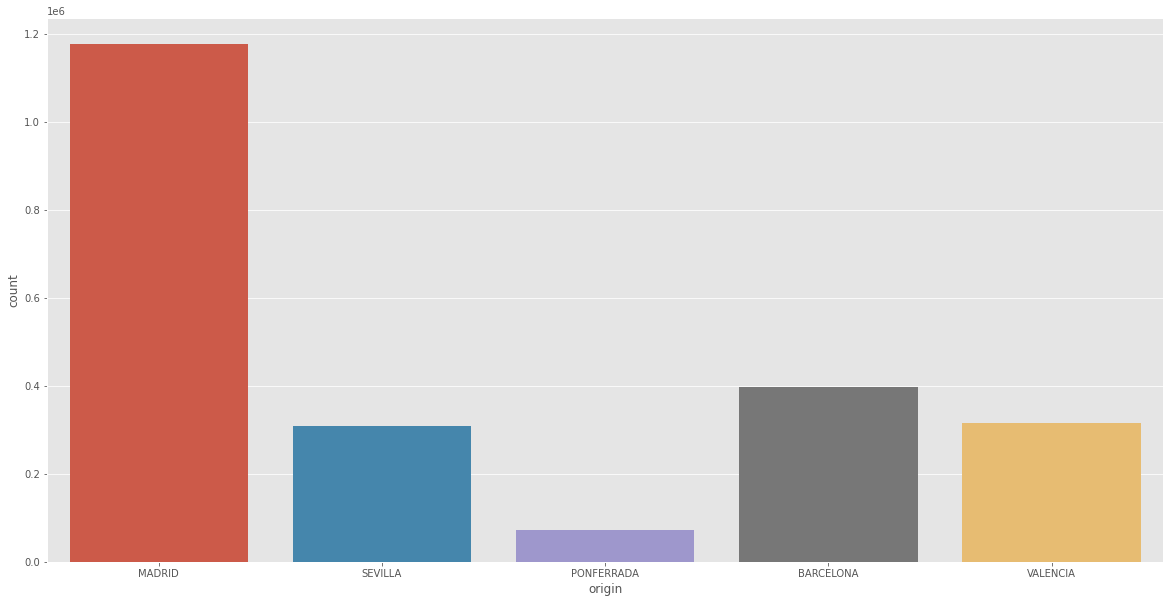

In [22]:
# The people start trip from this stations.

plt.figure(figsize=(20,10))
sns.countplot(df['origin'])
plt.show

##### The people start trip from this stations.

- MADRID 52%
- BARCELONA 15%
- SEVILLA 15%
- VALENCIA 13%
- PONFERRADA 5 %

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

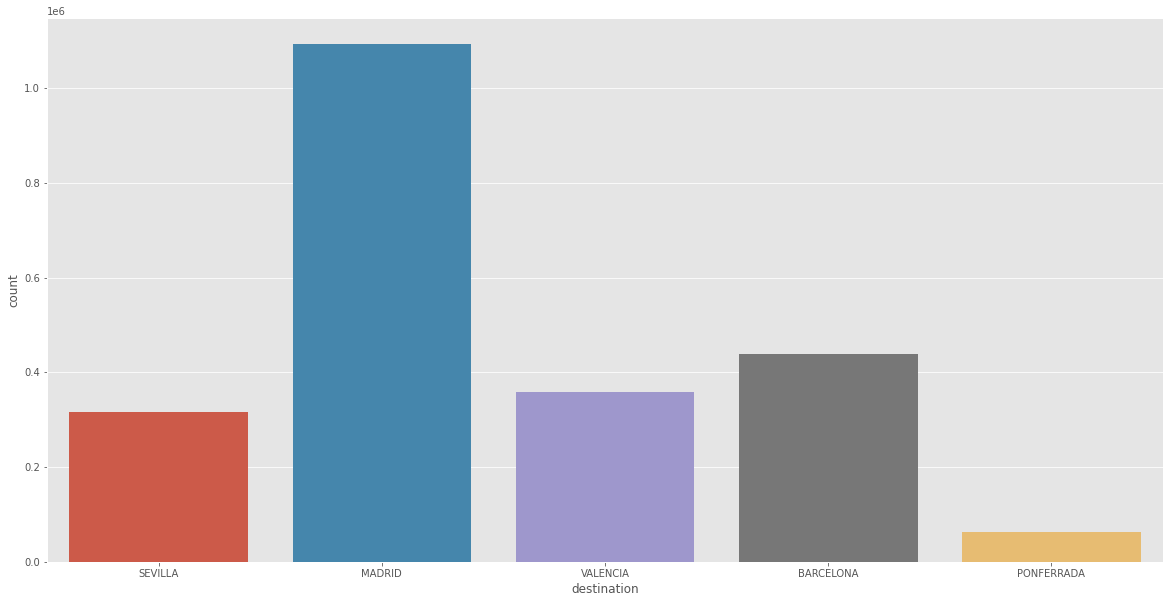

In [23]:
# The people finish trip from this stations.

plt.figure(figsize=(20,10))
sns.countplot(df['destination'])
plt.show

#### The people finish trip from this stations:

- MADRID 47%
- BARCELONA 18%
- SEVILLA 16%
- VALENCIA 15 %
- PONFERRADA 4%

#### Most people using train insite Madrid

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

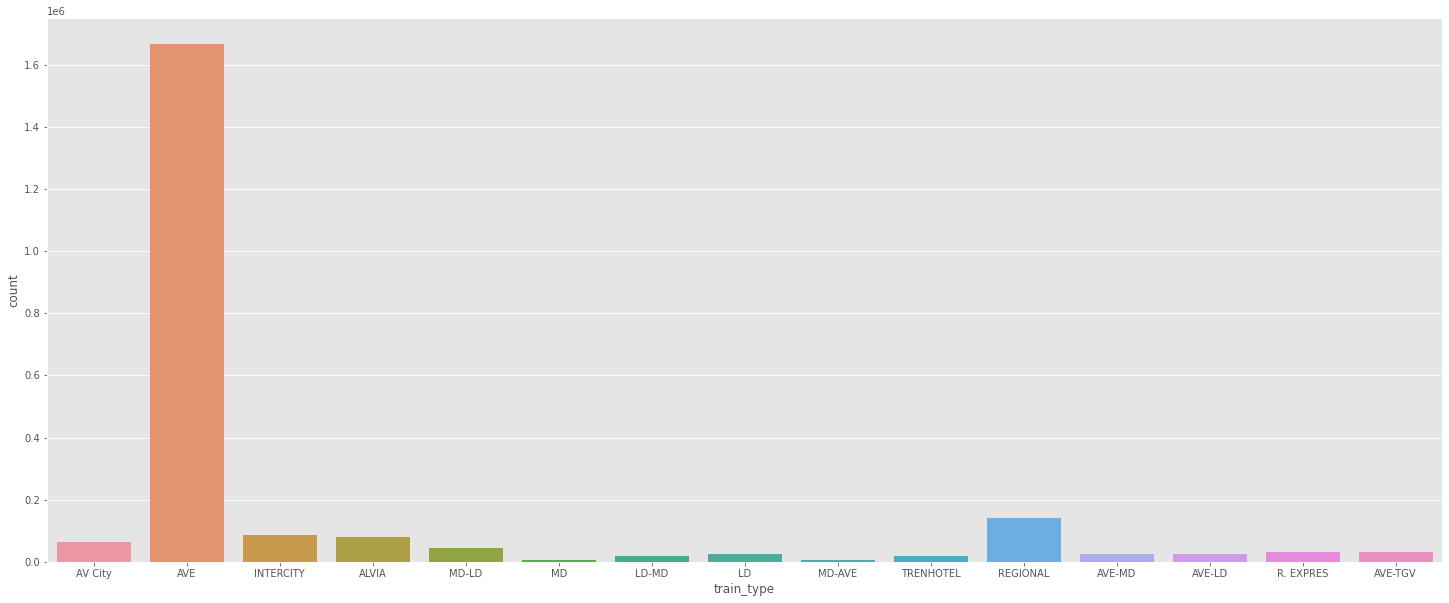

In [24]:
# the train type more popular there/ more using

plt.figure(figsize=(25,10))
sns.countplot(df['train_type'])
plt.show

#### The train type more popular there/ more using:

- AVE 70%
- ALVIA 7%
- REGIONAL 5%

- Other train less 5 %



<AxesSubplot:xlabel='train_type', ylabel='price'>

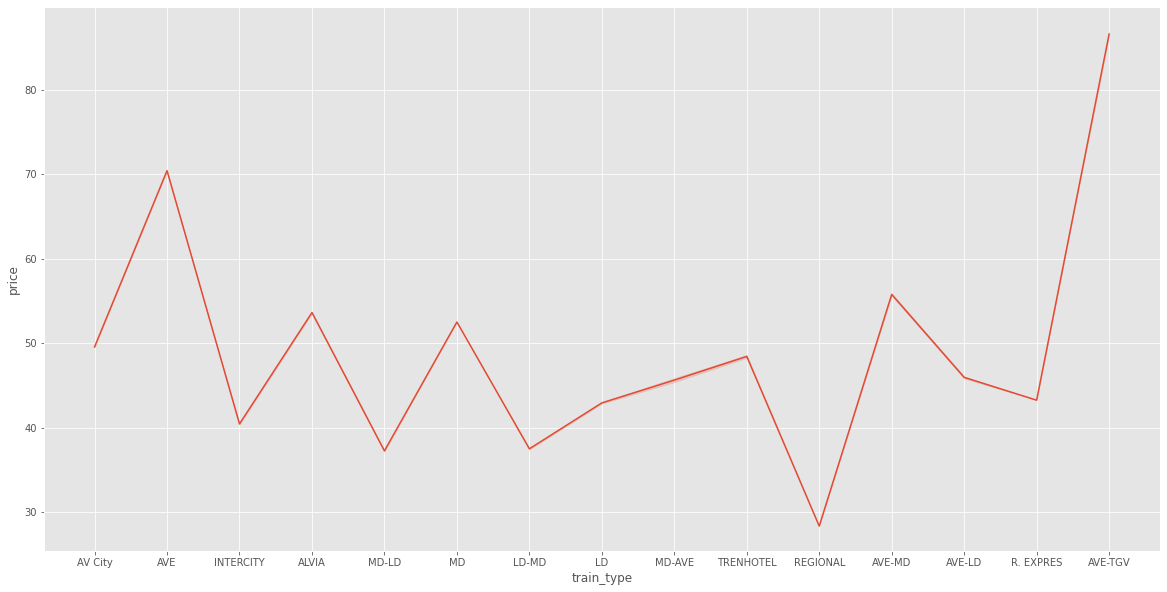

In [25]:
# any relationship between train type and price ?

plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="price")

- The train AVE not cheap but more people using this type of train

<AxesSubplot:xlabel='train_type', ylabel='Trip duration'>

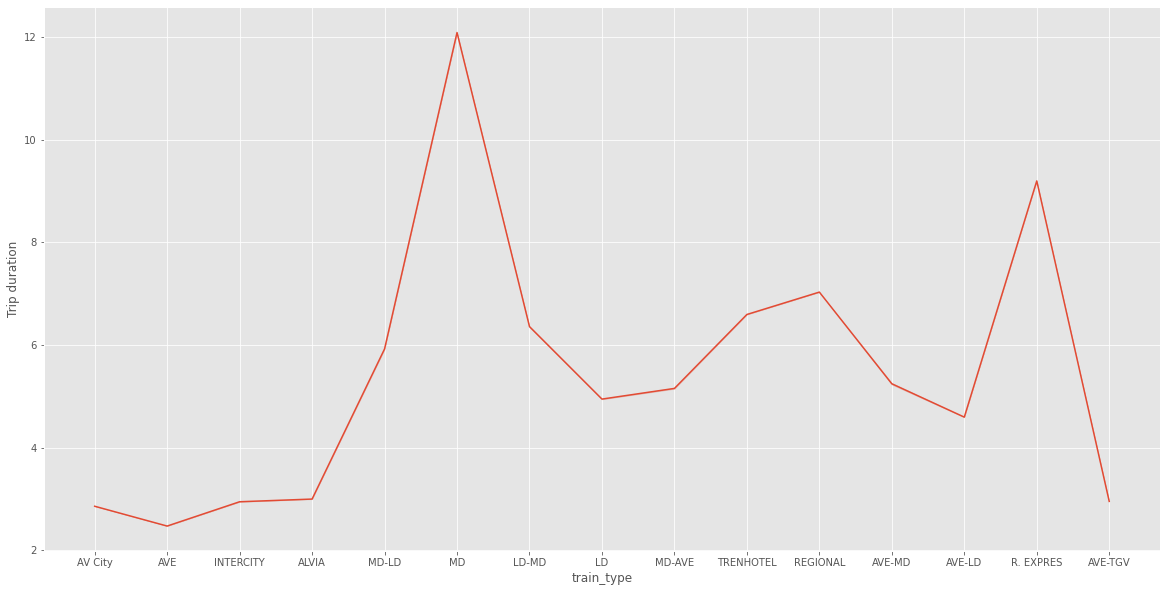

In [26]:
# any relationship between train type and Trip duration ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="Trip duration")

- the people prefer train AVE because faster 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

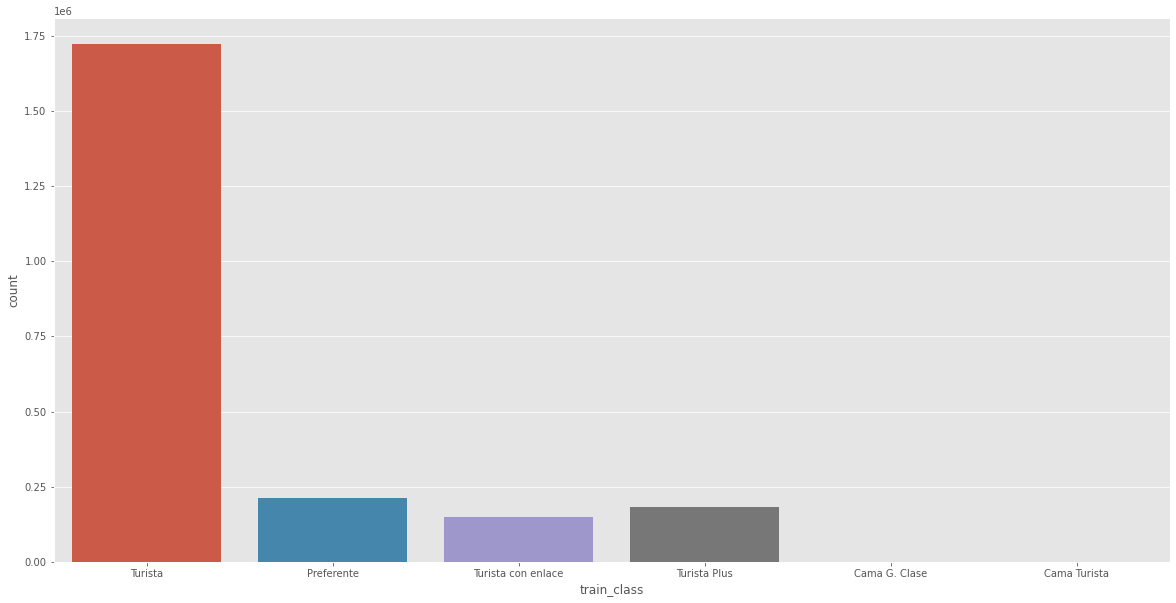

In [27]:
# the train class more popular there/ more using

plt.figure(figsize=(20,10))
sns.countplot(df['train_class'])
plt.show

#### The train class more popular there/ more using :

- Turista 75%
- Preferente 10%
- Turista Plus 8%
- Turista con enlace 7%
- Cama Turista 0
- Cama G. Clase 0


<AxesSubplot:xlabel='train_class', ylabel='price'>

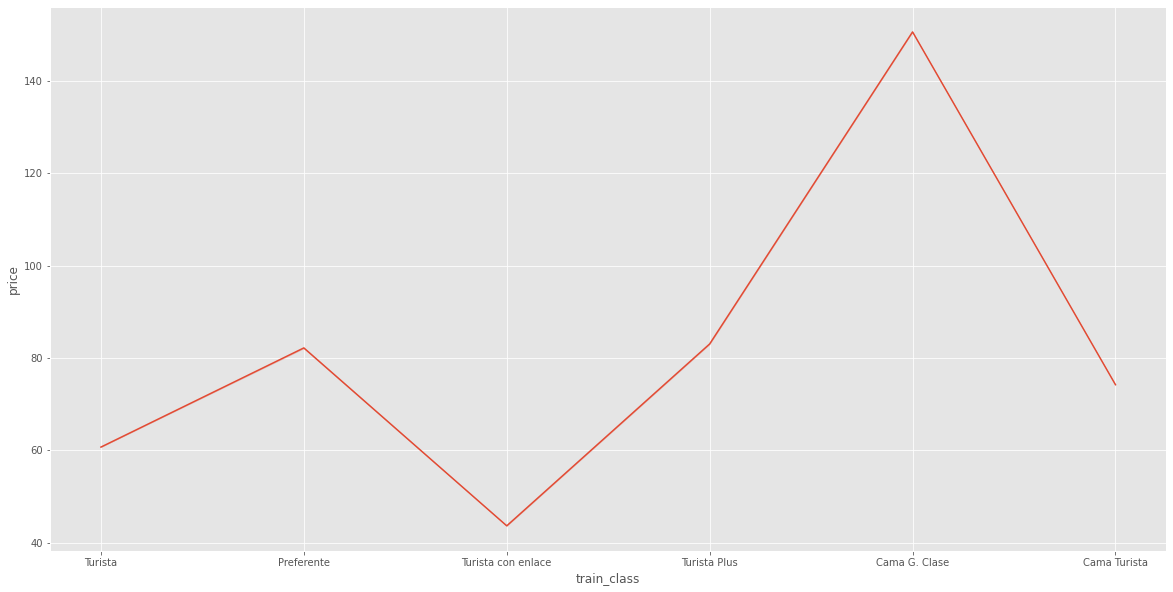

In [28]:
# any relationship between train class  and price ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_class",y="price")

<AxesSubplot:xlabel='train_class', ylabel='Trip duration'>

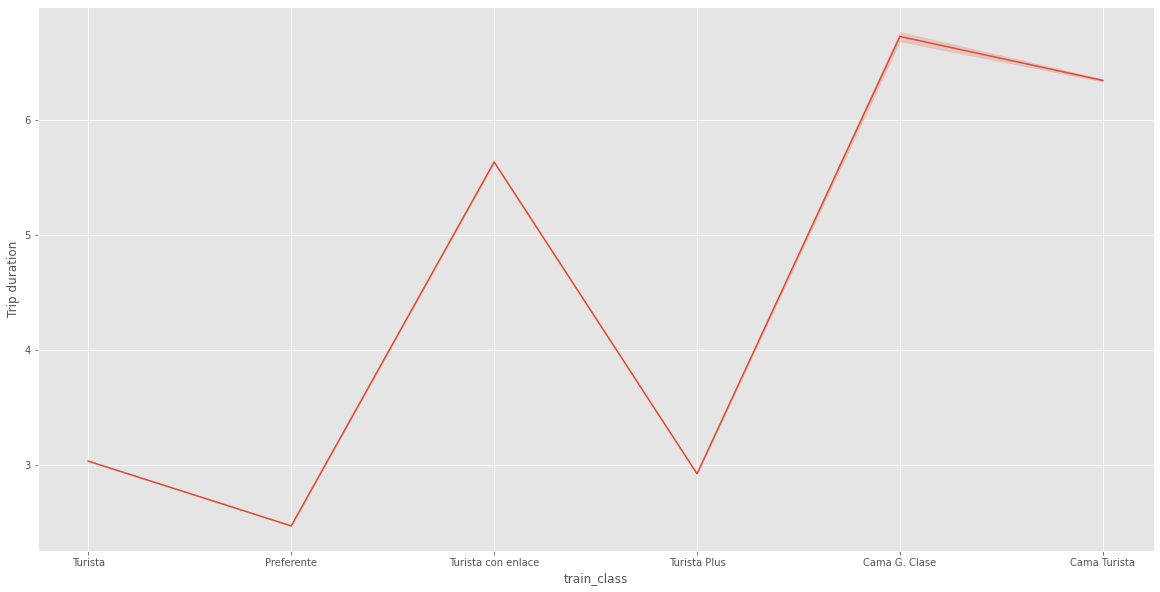

In [29]:
# any relationship between train class  and Trip duration ?

plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_class",y="Trip duration")

- The people prefer train class Turista because faster and cheaper

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

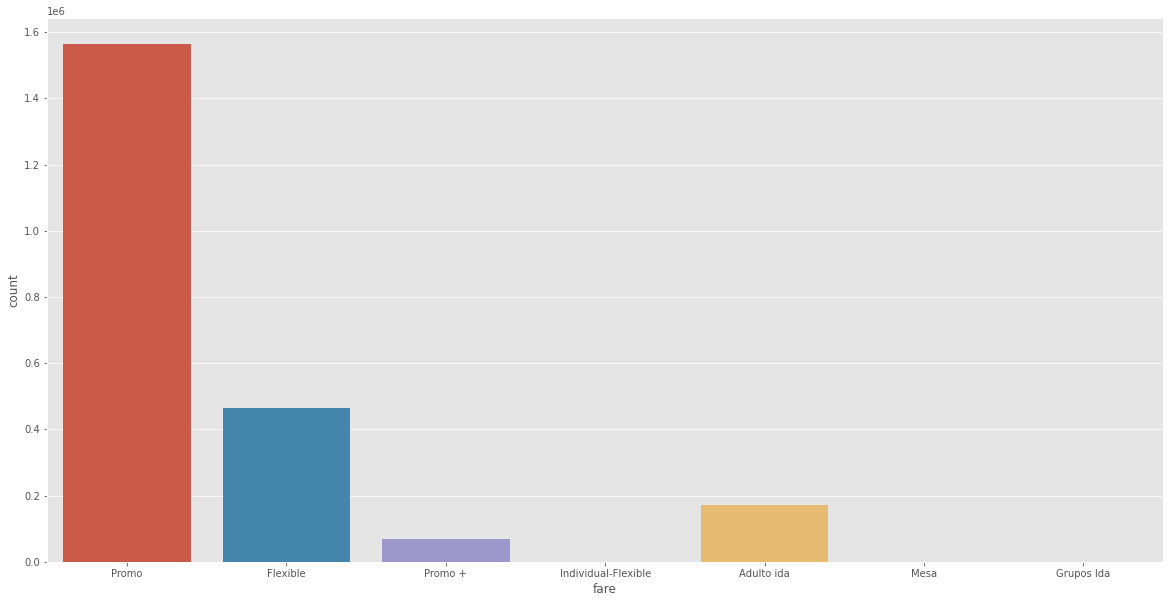

In [30]:
# the fare more popular there/ more using

plt.figure(figsize=(20,10))
sns.countplot(df['fare'])
plt.show

#### The fare more popular there/ more using :

- Promo 68%
- Flexible 23%
- Adulto ida 7%
- Promo 2%
- Individual-Flexible 0
- Mesa 0
- Grupos Ida 0

<AxesSubplot:xlabel='fare', ylabel='price'>

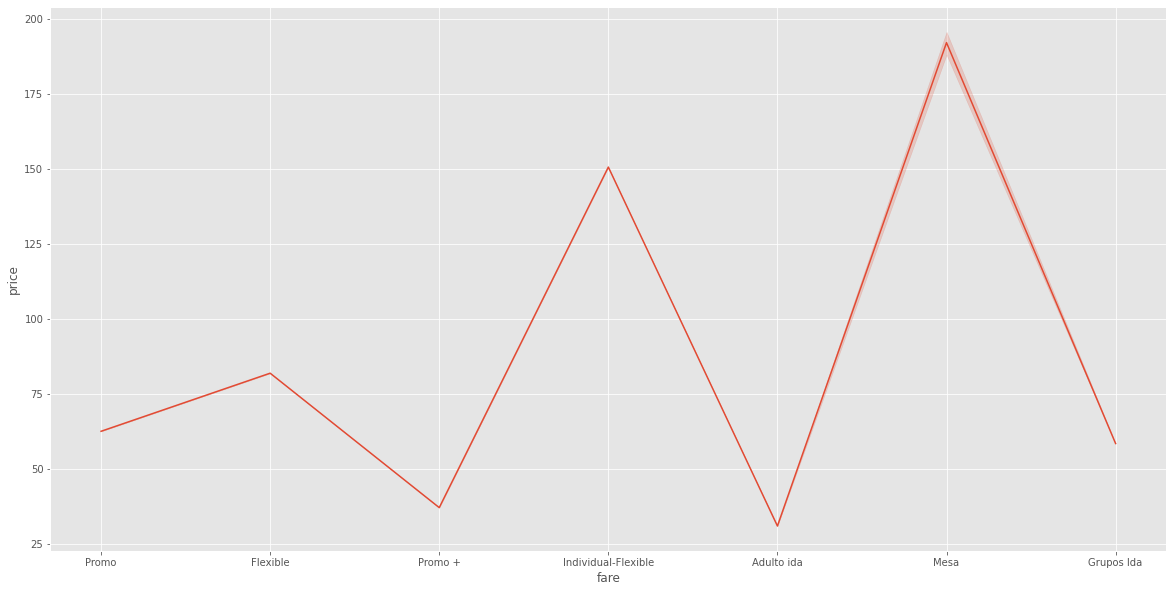

In [31]:
# any relationship between fare  and price ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="fare",y="price")

<AxesSubplot:xlabel='fare', ylabel='Trip duration'>

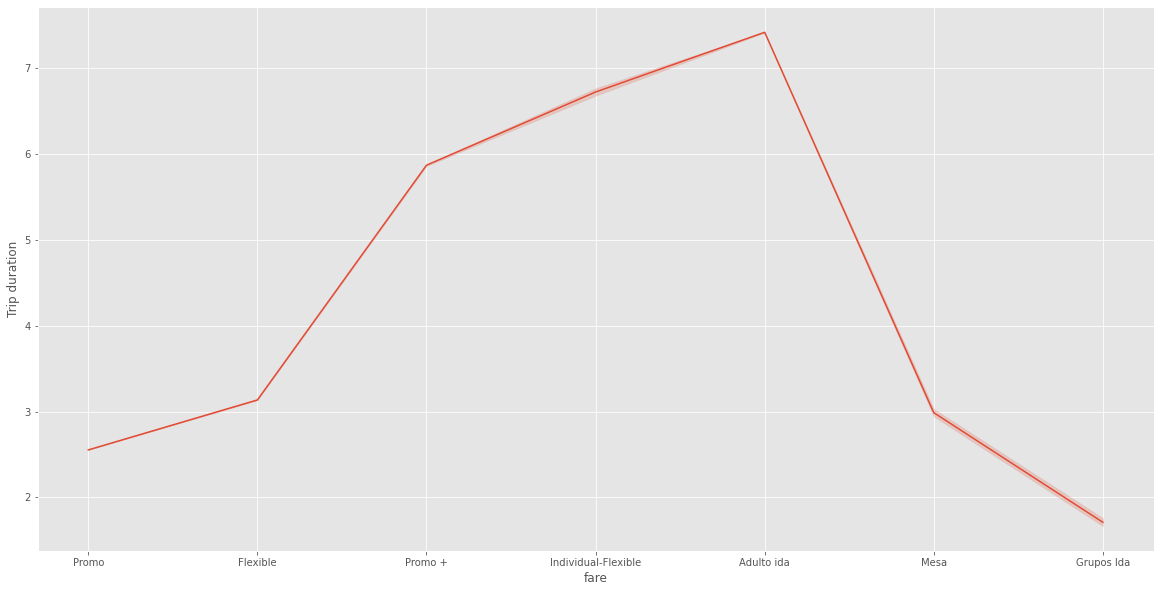

In [32]:
 # any relationship between fare  and Trip duration ?
    
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="fare",y="Trip duration")

- The people prefer fare - Promo-  because faster and cheaper around 60 $ and the time 2:30

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

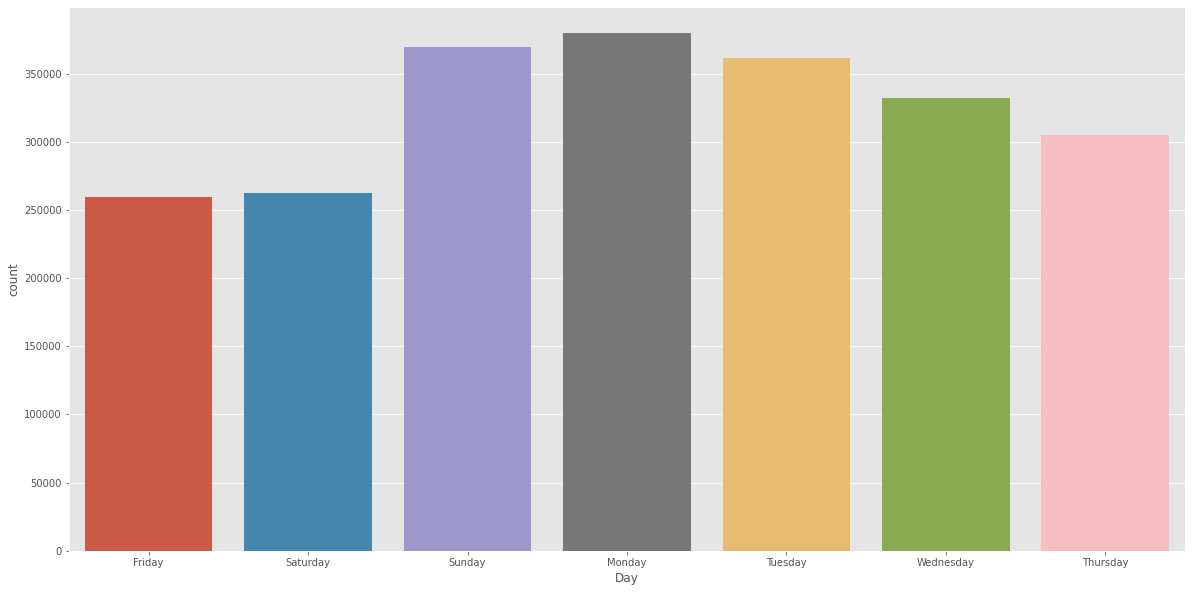

In [33]:
# the more popular Days the people more using train

plt.figure(figsize=(20,10))
sns.countplot(df['Day'])
plt.show

- Monday 17 %
- Tuesday 15%
- Wednesday 14 %
- Thursday 12%
- Friday 13 %
- Saturday 13 %
- Sunday 16 %


<AxesSubplot:xlabel='Trip duration', ylabel='price'>

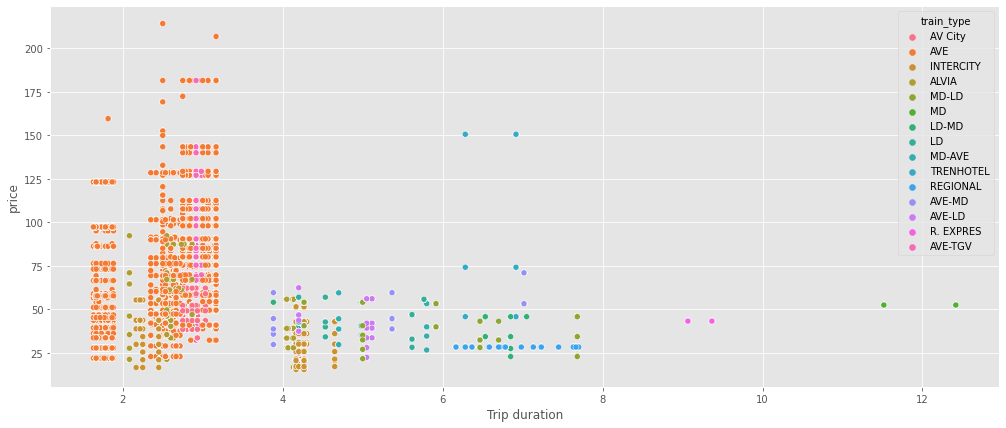

In [34]:
# show graph in any relationship between time and price

plt.figure(figsize=(17,7))
sns.scatterplot(data=df,x="Trip duration",y="price",hue="train_type")

# Make group by and fitter

In [35]:
# make filter origin from Madrid to other destination

df_M=df[(df["origin"]=="MADRID")]
df_M.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
0,0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,Friday,2.933333,4,19,2019
1,1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,Friday,2.533333,4,19,2019
2,2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,Friday,2.350000,4,19,2019
3,3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,Friday,2.533333,4,19,2019
4,5,5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo,Friday,2.633333,4,19,2019


In [36]:
# make group by 

M=df_M.groupby(["destination","train_type"],as_index=False)["Trip duration","price"].mean()
M

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,destination,train_type,Trip duration,price
0,BARCELONA,AVE,2.813165,87.018677
1,BARCELONA,AVE-TGV,2.983333,87.228629
2,BARCELONA,R. EXPRES,9.366667,43.250000
3,PONFERRADA,ALVIA,4.050000,46.414830
4,PONFERRADA,AVE-LD,4.200000,43.222886
5,PONFERRADA,AVE-MD,4.092260,47.976397
6,PONFERRADA,LD,4.200000,46.836863
7,PONFERRADA,LD-MD,5.936954,38.805386
8,PONFERRADA,TRENHOTEL,6.283333,49.252821
9,SEVILLA,ALVIA,2.586920,66.442910


In [37]:
# drow interactive graph

px.scatter(M,x="Trip duration",y="price",animation_frame="destination",color="train_type")

In [38]:
# make filter origin from BARCELONA to other destination

df_B=df[(df["origin"]=="BARCELONA")]
df_B.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
1629,1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo,Friday,2.500000,4,19,2019
1630,1816,1816,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:05:00,2019-04-25 09:15:00,AVE,80.15,Turista Plus,Promo,Friday,3.166667,4,19,2019
1631,1817,1817,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:25:00,2019-04-25 08:55:00,AVE,88.95,Turista,Promo,Friday,2.500000,4,19,2019
1632,1818,1818,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:40:00,2019-04-25 09:25:00,AVE,90.50,Turista Plus,Promo,Friday,2.750000,4,19,2019
1633,1819,1819,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 07:00:00,2019-04-25 09:30:00,AVE,127.10,Turista,Flexible,Friday,2.500000,4,19,2019


In [39]:
# make group by 

B=df_B.groupby(["destination","train_type"])["Trip duration","price"].mean()
B

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      AVE              2.826255  86.623792
            AVE-TGV          2.916667  85.825570
            R. EXPRES        9.066667  43.250000

<AxesSubplot:xlabel='destination,train_type'>

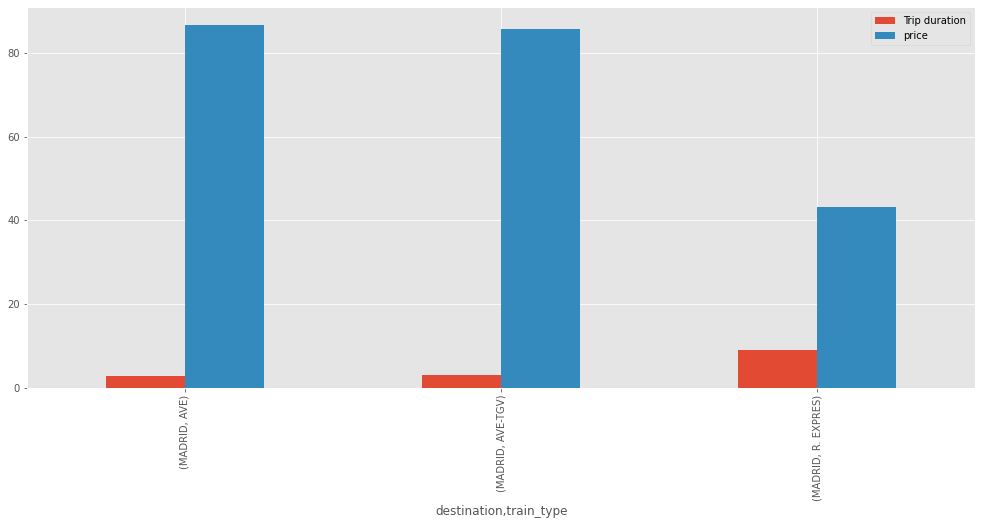

In [40]:
# make graph
B.plot(kind="bar",figsize=(17,7))

In [41]:
# make filter origin from SEVILLA to other destination

df_S=df[(df["origin"]=="SEVILLA")]
df_S.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
58,67,67,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 06:10:00,2019-05-28 08:58:00,AV City,43.55,Turista,Promo,Friday,2.800000,4,19,2019
59,68,68,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 06:45:00,2019-05-28 09:15:00,AVE,76.30,Turista,Flexible,Friday,2.500000,4,19,2019
60,69,69,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 07:15:00,2019-05-28 09:55:00,AVE,53.40,Turista,Promo,Friday,2.666667,4,19,2019
61,70,70,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 07:40:00,2019-05-28 10:05:00,AVE,60.30,Turista,Promo,Friday,2.416667,4,19,2019
62,71,71,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 08:45:00,2019-05-28 11:15:00,AVE,76.30,Turista,Flexible,Friday,2.500000,4,19,2019


In [42]:
# make group by 

S=df_S.groupby(["destination","train_type"])["Trip duration","price"].mean()
S

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      ALVIA            2.720450  66.560844
            AV City          2.879860  50.761134
            AVE              2.535971  64.859143
            INTERCITY        2.666667  62.200000
            LD-MD            6.850109  35.961550
            MD              12.088195  52.500000

<AxesSubplot:xlabel='destination,train_type'>

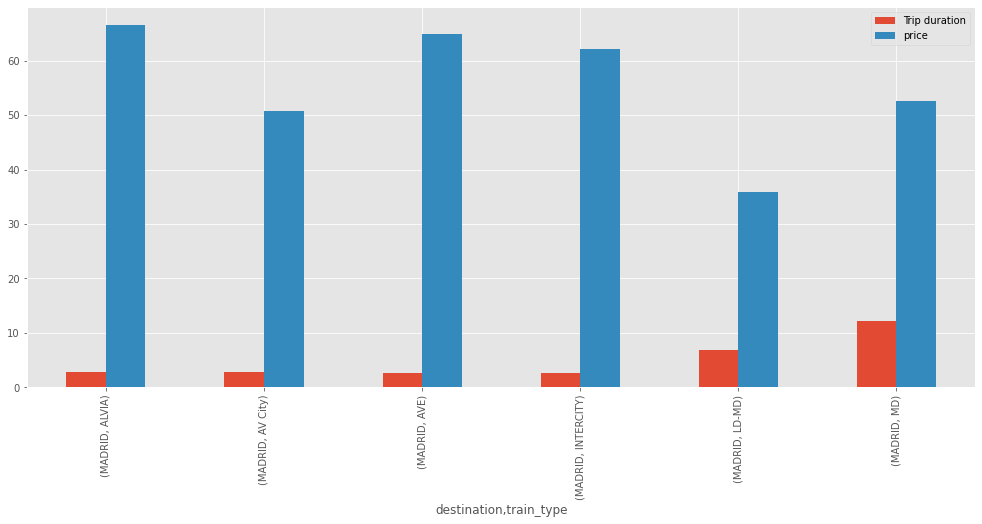

In [43]:
# make graph
S.plot(kind="bar",figsize=(17,7))

In [44]:
# make filter origin from VALENCIA to other destination

df_V=df[(df["origin"]=="VALENCIA")]
df_V.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
4016,4433,4433,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 10:40:00,2019-04-28 12:27:00,AVE,73.10,Turista,Flexible,Friday,1.783333,4,19,2019
4152,4573,4573,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 06:38:00,2019-04-28 13:37:00,REGIONAL,28.35,Turista,Adulto ida,Friday,6.983333,4,19,2019
4153,4574,4574,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 08:00:00,2019-04-28 09:53:00,AVE,66.55,Preferente,Promo,Friday,1.883333,4,19,2019
4154,4575,4575,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 09:50:00,2019-04-28 16:58:00,REGIONAL,28.35,Turista,Adulto ida,Friday,7.133333,4,19,2019
4155,4576,4576,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 12:40:00,2019-04-28 14:20:00,AVE,51.15,Turista,Promo,Friday,1.666667,4,19,2019


In [45]:
# make group by 

V=df_V.groupby(["destination","train_type"])["Trip duration","price"].mean()
V

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      ALVIA            2.550000  46.767803
            AVE              1.729050  45.309527
            INTERCITY        3.106862  32.014586
            MD-LD            6.475652  30.794604
            REGIONAL         7.492124  28.350000

<AxesSubplot:xlabel='destination,train_type'>

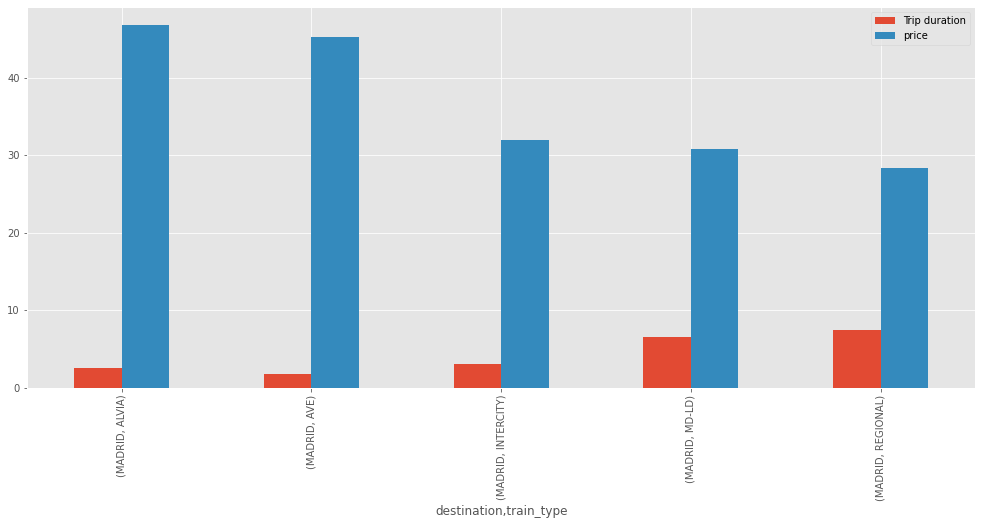

In [46]:
# make graph
V.plot(kind="bar",figsize=(17,7))

In [47]:
# make filter origin from PONFERRADA to other destination

df_P=df[(df["origin"]=="PONFERRADA")]
df_P.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
567,680,680,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 11:28:00,2019-04-28 16:00:00,LD,57.00,Turista con enlace,Flexible,Friday,4.533333,4,19,2019
568,681,681,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 11:44:00,2019-04-28 16:00:00,MD-LD,54.10,Turista con enlace,Flexible,Friday,4.266667,4,19,2019
569,683,683,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 15:00:00,2019-04-28 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,Friday,4.700000,4,19,2019
570,684,684,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 17:15:00,2019-04-28 23:03:00,MD-AVE,39.95,Turista con enlace,Promo +,Friday,5.800000,4,19,2019
571,685,685,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 17:15:00,2019-04-28 23:10:00,MD-LD,53.30,Turista con enlace,Flexible,Friday,5.916667,4,19,2019


In [48]:
# make group by 

P=df_P.groupby(["destination","train_type"])["Trip duration","price"].mean()
P

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      ALVIA            4.079444  35.348646
            LD               5.022031  42.527194
            MD-AVE           5.153288  45.623451
            MD-LD            4.789095  41.812172
            TRENHOTEL        6.916667  47.565925

<AxesSubplot:xlabel='destination,train_type'>

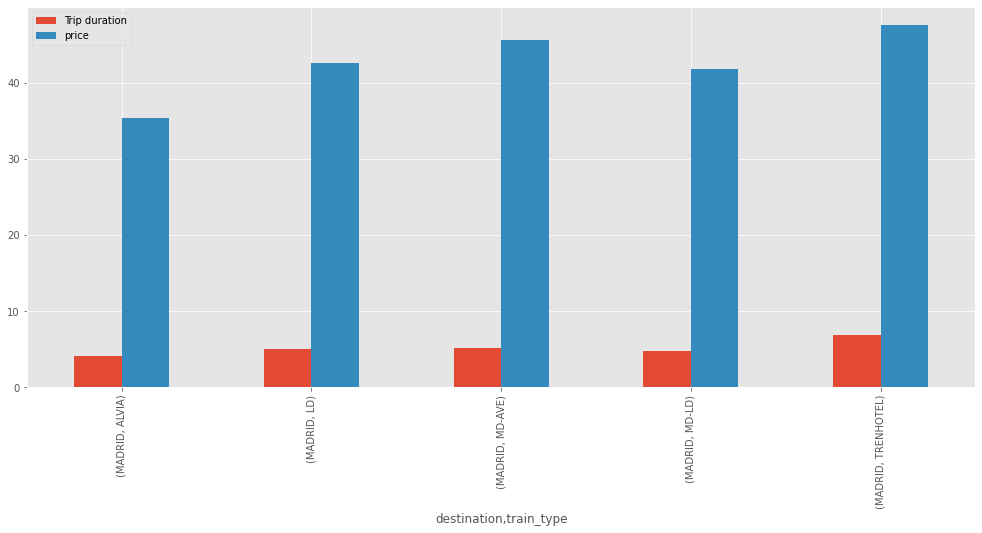

In [49]:
# make graph
P.plot(kind="bar",figsize=(17,7))

# Analysis Results:

## Public Transportations in Spain

#### This sample around 30 days , 2.5 million rows.
#### The columns:
- Insert date -> Date
- Origin - from where
- Destination
- Start_date - start trip
- End_date- end trip
- Train_type
- Price
- Train_class
- Fare
-------------

- We have 2,579,771 rows. 
- We have 2,579,771 rows.after handle missing data and 10 columns

##### Average price 63


##### The data from 19/4/2019 to 18/5/2019 = 29 Days


#### The train strat from  MADRID  to 5 destination in insite MADRID , BARCELONA  , SEVILLA  , VALENCIA ,PONFERRADA .
#### This 5 destination just going to MADRID .


### The people start trip from this stations.
- MADRID 52%
- BARCELONA 15%
- SEVILLA 15%
- VALENCIA 13%
- PONFERRADA 5 %


### The people finish trip from this stations:
- MADRID 47%
- BARCELONA 18%
- SEVILLA 16%
- VALENCIA 15 %
- PONFERRADA 4%

### Most people using train insite Madrid



### The train type more popular there/ more using:
- AVE 70%
- ALVIA 7%
- REGIONAL 5%

- Other train less 5 %
 
### The people prefer train AVE because faster but not cheaper.





### The train class more popular there/ more using :
- Turista 75%
- Preferente 10%
- Turista Plus 8%
- Turista con enlace 7%
- Cama Turista 0
- Cama G. Clase 0


### The people prefer train class Turista because faster and cheaper




### The fare more popular there/ more using :
- Promo 68%
- Flexible 23%
- Adulto ida 7%
- Promo 2%
- Individual-Flexible 0
- Mesa 0
- Grupos Ida 0


### The people prefer fare - Promo- because faster and cheaper around 60 €  and the time 2:30




#### The days using train
- Monday 17 %
- Tuesday 15%
- Wednesday 14 %
- Thursday 12%
- Friday 13 %
- Saturday 13 %
- Sunday 16 %




# Notes 😃😃😃😃

- Thank for reading my analysis 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️



# Vote ❤️😃
- If you liked my work vote me ,


# The End 🤝🎉🤝🎉